# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic
1. Defining the problem statement<br>
2. Collecting the data
3. Exploratory data analysis
4. Feature engineering
5. Modelling
6. Testing

## 1. Defining the problem statement
<br>
Complete the analysis of what sorts of people were likely to survive.<br>
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.<br>

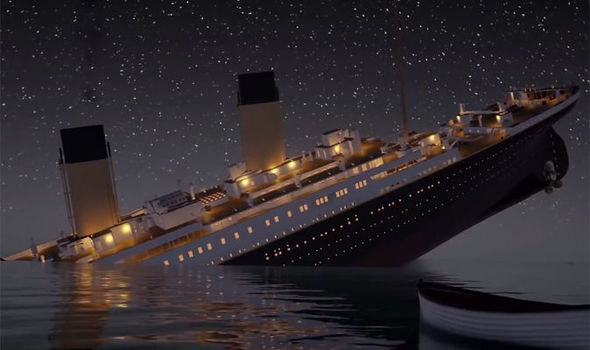

In [1]:
from IPython.display import Image
Image('titanic-disaster.jpg')

## Importing train and test datasets

In [2]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

##  Trying to explore the data 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Importing the Visualization libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() # Setting Seaborn as default for plotting

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead =train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked = True,figsize=(10,5))

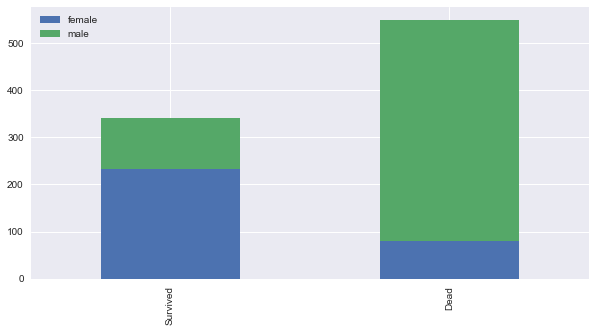

In [13]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

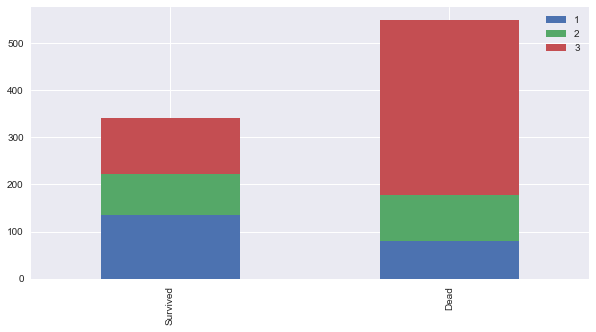

In [14]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**<br>
The Chart confirms **3rd class** more likely dead than **other classes**

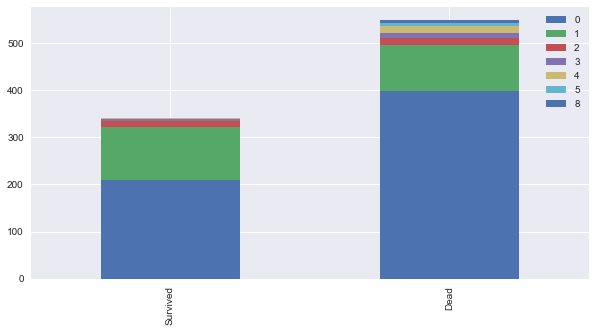

In [15]:
bar_chart('SibSp')

The Chart confirms a **person aboarded with more than 2 siblings or spouse** more likely survived<br>
The Chart confirms a **person aboarded without siblings or spouse** more likely dead

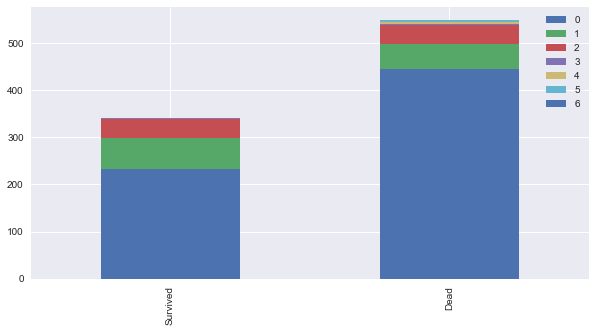

In [16]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived<br>
The Chart confirms **a person aboarded alone** more likely dead

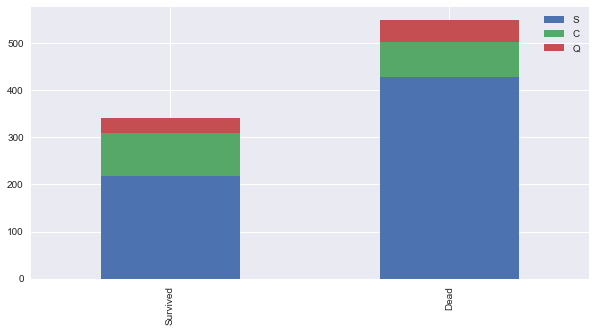

In [17]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived<br>
The Chart confirms **a person aboarded from Q** more likely dead<br>
The Chart confirms **a person aboarded from S** more likely dead<br>

## 4. Feature engineering
<br>
Feature engineering is the process of using domain knowledge of the data<br>
to create features **(feature vectors)** that make machine learning algorithms work.<br>
<br>
feature vector is an n-dimensional vector of numerical features that represent some object.<br>
Many algorithms in machine learning require a numerical representation of objects,<br>
since such representations facilitate processing and statistical analysis.<br>

### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located<br>
conclusion, Pclass is key feature for classifier<br>

In [18]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 4.2 Name

In [20]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand = False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Countess      1
Don           1
Capt          1
Sir           1
Ms            1
Mme           1
Lady          1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

### Title map
Mr : 0<br>
Miss : 1<br>
Mrs: 2<br>
Others: 3<br>

In [23]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


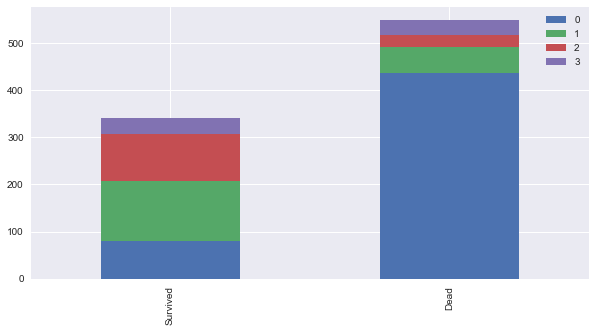

In [26]:
bar_chart('Title')

In [27]:
train.drop('Name',axis =1,inplace = True)
test.drop('Name',axis =1,inplace = True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.3 Sex
male: 0 female: 1

In [30]:
sex_mapping = {'male':0,'female':1}

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


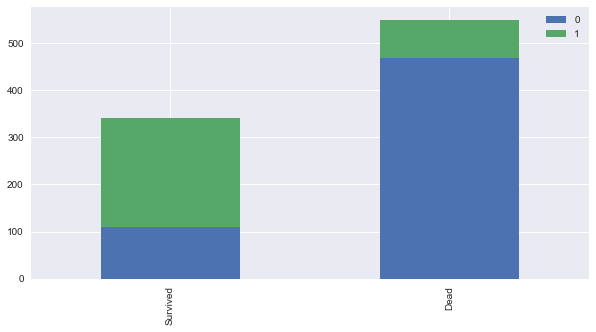

In [33]:
bar_chart("Sex")

### 4.4 Age
#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [36]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [38]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)

train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace = True)
test['Age'].fillna(test.groupby('Title')["Age"].transform("median"),inplace = True)

In [39]:
train.head(100)
train.groupby('Title')["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

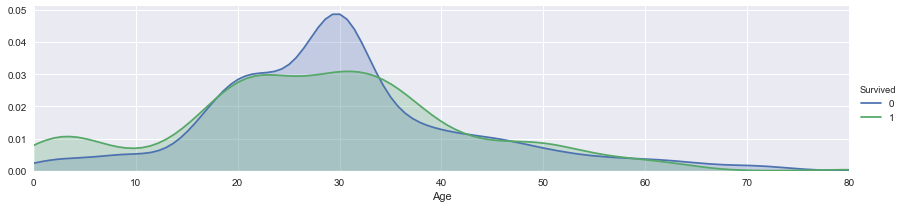

In [44]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.show()

(0, 20)

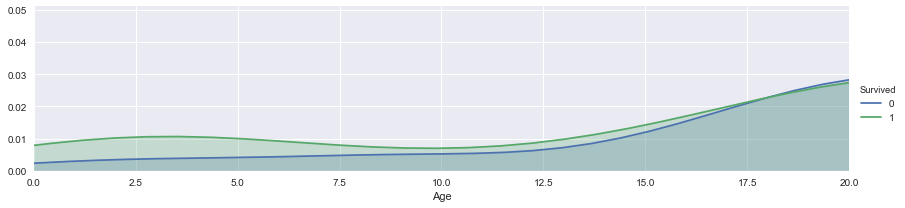

In [45]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(0,20)

(20, 30)

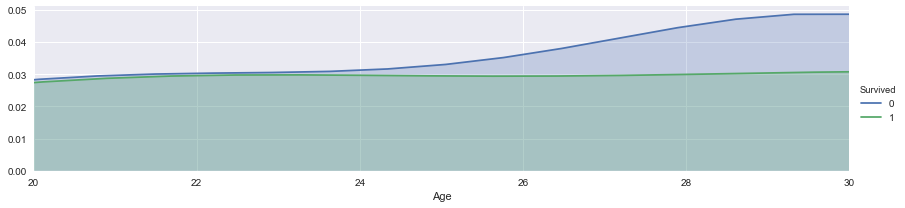

In [46]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(20,30)

(30, 40)

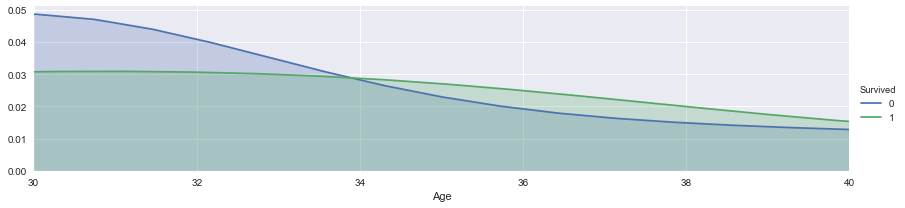

In [47]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(30,40)

(40, 50)

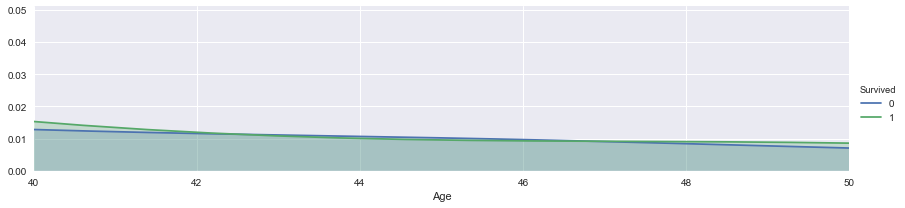

In [48]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(40,50)

(50, 60)

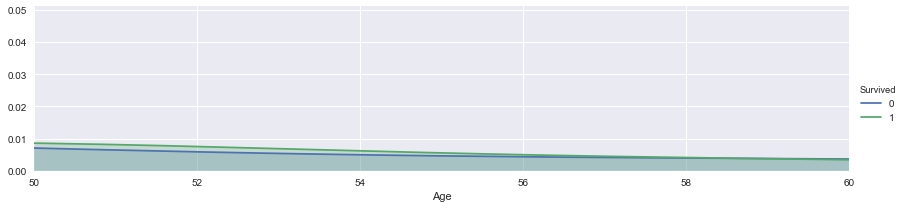

In [49]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(50,60)

(60, 80)

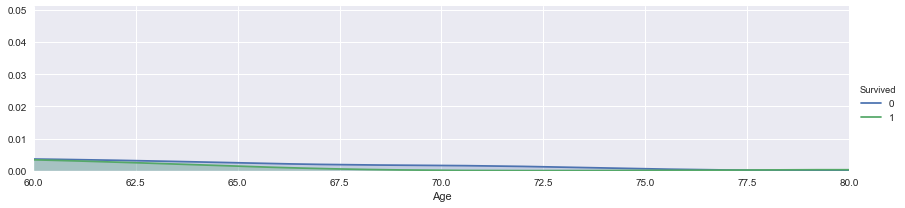

In [50]:
facet = sns.FacetGrid(train,hue ="Survived",aspect = 4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.xlim(60,80)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB



#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable<br>

feature vector map:<br>
child: 0<br>
young: 1<br>
adult: 2<br>
mid-age: 3<br>
senior: 4<br>

In [54]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16,'Age'] = 0,
    dataset.loc[(dataset["Age"] >= 16) & (dataset["Age"] <=26),'Age'] =1,
    dataset.loc[(dataset["Age"] >= 26) & (dataset["Age"] <=36),'Age'] =2,
    dataset.loc[(dataset["Age"] >= 36) & (dataset["Age"] <=62),'Age'] =3,
    dataset.loc[dataset["Age"] >= 62,'Age'] = 4

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


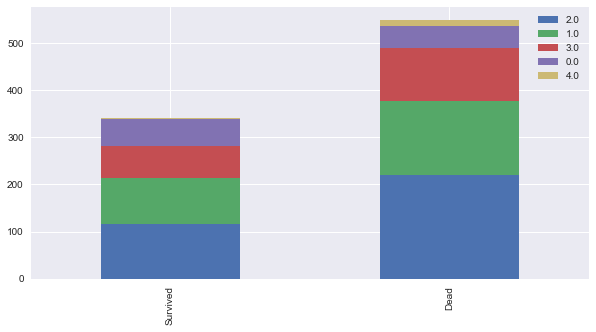

In [56]:
bar_chart("Age")

### 4.5 Embarked
#### 4.5.1 filling missing values

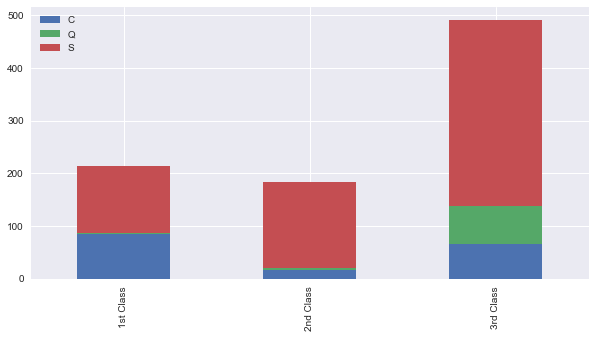

In [57]:
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()
df =pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ["1st Class","2nd Class","3rd Class"]
df.plot(kind = 'bar',stacked = True, figsize = (10,5))

more than 50% of 1st class are from S embark<br>
more than 50% of 2nd class are from S embark<br>
more than 50% of 3rd class are from S embark

#### fill out missing embark with S embark

In [58]:
for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].fillna('S')

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [60]:
embarked_mapping = {'S':0,'C':1,'Q':2}

for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].map(embarked_mapping)

### 4.6 Fare

In [62]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace = True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


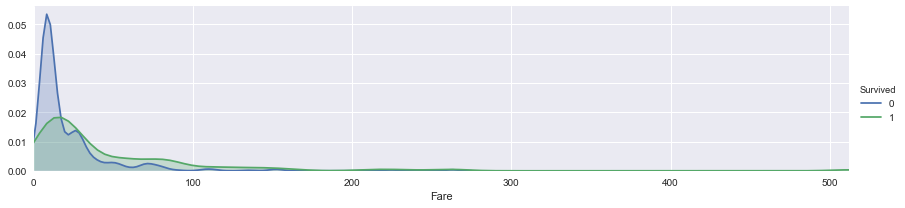

In [63]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

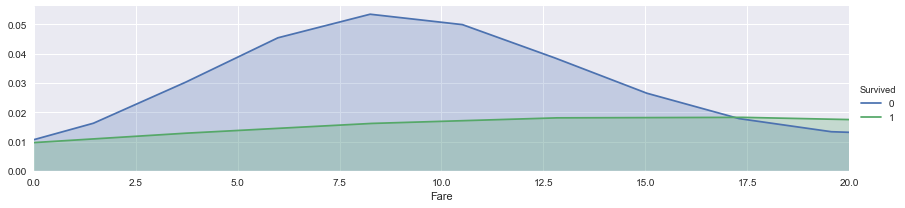

In [64]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,20)

(0, 30)

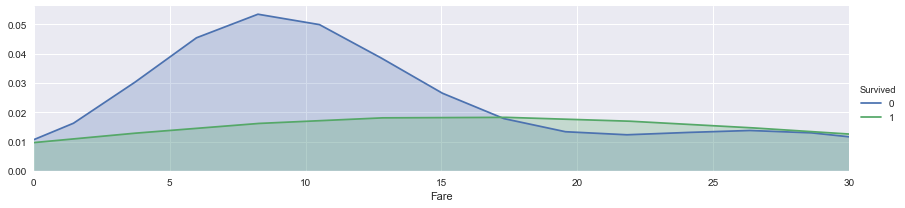

In [65]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0,30)

(0, 512.3292)

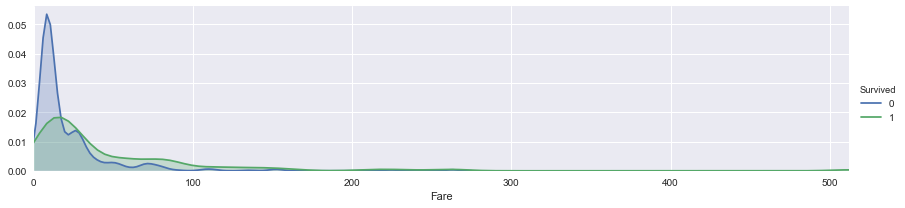

In [66]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.xlim(0)

In [69]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17,"Fare"] = 0,
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30),"Fare"] = 1,
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100),"Fare"] = 2,
    dataset.loc[dataset["Fare"] > 100,"Fare"] = 3

In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 4.7 Cabin

In [71]:
train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
C22 C26            3
E101               3
F2                 3
F33                3
D                  3
C93                2
E24                2
E25                2
E121               2
C92                2
E67                2
C2                 2
C126               2
C68                2
F G73              2
D35                2
C65                2
B5                 2
B58 B60            2
B57 B59 B63 B66    2
B35                2
D33                2
E8                 2
C125               2
E44                2
B49                2
B18                2
                  ..
C91                1
C46                1
E12                1
D11                1
B80                1
D6                 1
E38                1
C45                1
B69                1
C32                1
F38                1
D19                1
C104               1
E50                1
E31                1
C47                1
B4           

In [72]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

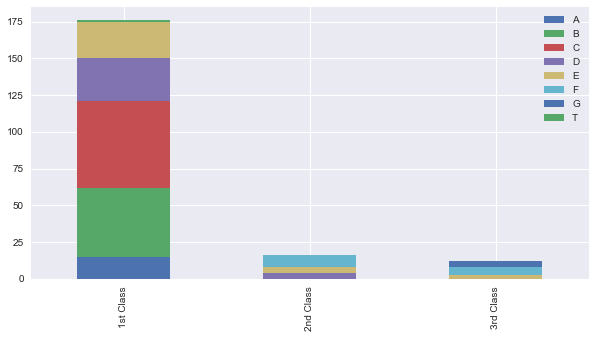

In [73]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3= train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ["1st Class","2nd Class","3rd Class"]
df.plot(kind = "bar",stacked = True, figsize = (10,5))

In [74]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"H":2.8}
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [75]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace = True)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


### 4.8 FamilySize

In [77]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

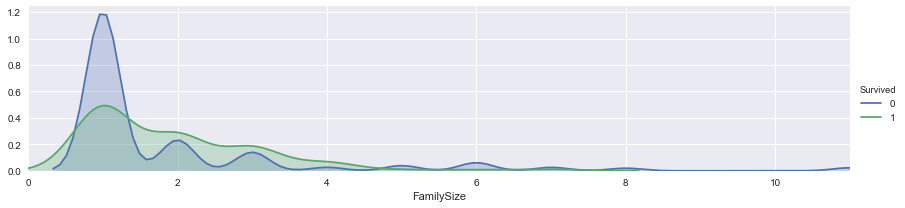

In [83]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,"FamilySize",shade =True)
facet.set(xlim = (0,train["FamilySize"].max()))
facet.add_legend()

plt.xlim(0)

In [84]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [86]:
feature_drop = ["Ticket","Parch","SibSp"]
train = train.drop(feature_drop,axis=1)
test = test.drop(feature_drop,axis=1)
train = train.drop(["PassengerId"],axis=1)

In [87]:
train_data = train.drop('Survived',axis=1)
target = train["Survived"]

train_data.shape,target.shape

((891, 8), (891,))

In [89]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## 5. Modelling

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


### 5.1 Cross Validation (K-fold)

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits =10, shuffle =True, random_state =0)

 ### kNN Classifier :

In [99]:
clf =KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [100]:
# KNN Final Score:

round(np.mean(score)*100,2)

82.6

### Decision Tree Classifier:

In [103]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.76404494 0.7752809  0.88764045 0.7752809
 0.82022472 0.82022472 0.74157303 0.78651685]


In [104]:
# Decision Tree Final Score:

round(np.mean(score)*100,2)

79.58

### Ramdom Forest Classifier:

In [105]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.82022472 0.82022472 0.76404494 0.85393258 0.79775281
 0.82022472 0.82022472 0.76404494 0.79775281]


In [106]:
# Random Forest Final Score:

round(np.mean(score)*100,2)

80.7

### Naive Bayes Classifier:

In [110]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.79775281
 0.76404494 0.80898876 0.86516854 0.83146067]


In [111]:
# Naive Bayes Final Score:
round(np.mean(score)*100, 2)

78.67

### SVM Classifier:

In [112]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [113]:
# Support Vector Machine Final Score:
round(np.mean(score)*100, 2)

83.5

## Final Testing :

In [115]:
clf =SVC()
clf.fit(train_data,target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction =clf.predict(test_data)

In [117]:
# print(prediction)

In [118]:
submission = pd.DataFrame({
    "PassengerID":test["PassengerId"],
    "Survived":prediction
})

submission.to_csv('Submission.csv',index = False)

In [119]:
submission_csv = pd.read_csv('Submission.csv')

In [120]:
submission_csv.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
